In [1]:
import numpy as np
from sklearn import datasets
from scipy.spatial.distance import pdist#计算距离
import networkx as nx
import matplotlib.pyplot as plt#画图

In [2]:
iris=datasets.load_iris()#加载鸢尾花数据集
data=iris.data
a,b=iris.data.shape#获取样本数目和特征数目

In [3]:
#计算个样本间的欧氏距离
A=np.zeros([a,a])
for i in range(a):
    for j in range(a):
        x=data[i]
        y=data[j]
        z=np.vstack([x,y])
        A[i][j]=pdist(z)

In [4]:
#根据阈值确定相似度 1 有关系 0没关系
for i in range(a):
    for j in range(a):
        if A[i][j]<=0.8:
            A[i][j]=1
        else:
            A[i][j]=0
for i in range(50,150):
    for j in range(50,150):
        x=data[i][3]
        y=data[j][3]
        z=np.vstack([x,y])
        A[i][j]=pdist(z)

for i in range(50,150):
    for j in range(50,150):
        if A[i][j]>=0.4:
            A[i][j]=0
        else:
            A[i][j]=1

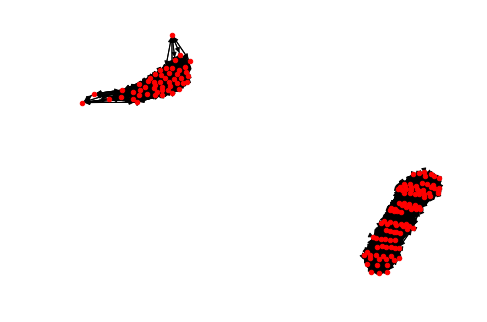

In [5]:
#画图
G_0=nx.DiGraph()
list1=[]
list2=[]
for  i in range(0,150):
    for j in range(0,150):
        if A[i][j]==1:
            list1.append((i,j))
            list2.append(i)
G_0.add_nodes_from(list2)
G_0.add_edges_from(list1)
nx.draw(G_0,node_shape='o',node_size=20)

In [6]:
#定义马尔科夫聚类算法
def Markov_cluster(t,A,r):#t 为迭代次数 A 为邻接矩阵 r  为膨胀算子
    sum=np.sum(A,axis=0)
   
    B=A/sum
    def _expand(B):
        expandMat=np.dot(B,B)
        return expandMat
    expandMat=_expand(B)
    def _inflate(expandMat,r):
        C=expandMat
        for i in range(r-1):
            C=C*expandMat
        axissum=np.sum(C,axis=0)
        
        inflateMat=C/axissum
        return inflateMat
    inflateMat=_inflate(expandMat,r)
    for i in range(t):
        expand=_expand(inflateMat)
        inflateMat=_inflate(expand,r)
    return(inflateMat)

In [7]:
#调节参数并得到带权矩阵abq
abq=Markov_cluster(13,A,2)

In [8]:
#分别传入聚类的节点和边
list3=[]
list4=[]
list5=[]
list6=[]
list7=[]
list8=[]
for i in range (0,150):
    for  j in range(0,150):
        if abq[i][j]==1:
            list3.append((i,j))
            list4.append(j)
        elif abq[i][j]==abq[71][50]:
            list5.append((i,j))
            list6.append(j)
        elif abq[i][j]==abq[102][100]:
            list7.append((i,j))
            list8.append(j)
list6=list(set(list6))
list8=list(set(list8))

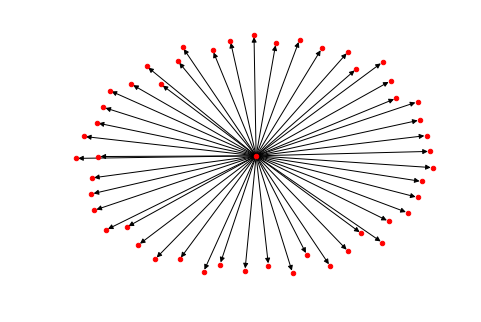

In [9]:
#输出1聚类的图
G_1=nx.DiGraph()
G_1.add_nodes_from(list4)
G_1.add_edges_from(list3)         
nx.draw(G_1,node_shape='o',node_size=20)

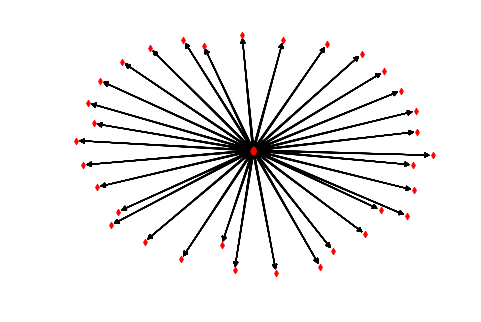

In [10]:
#输出2聚类的图
G_2=nx.DiGraph()
G_2.add_nodes_from(list6)
G_2.add_edges_from(list5)         
nx.draw(G_2,node_shape='d',node_size=20)

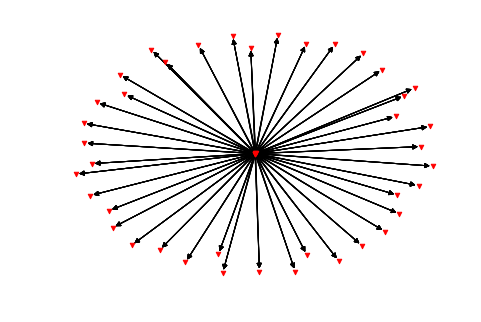

In [11]:
#输出3聚类的图
G_3=nx.DiGraph()
G_3.add_nodes_from(list8)
G_3.add_edges_from(list7)         
nx.draw(G_3,node_shape='v',node_size=20)

In [12]:
#得到各类的数目
len1=len(list4)
len2=len(list6)
len3=len(list8)

In [13]:
#计算正确分类的个数
count=0
for i in range(len1):
    if(list4[i]>=0 and list4[i]<=49):
        count=count+1
for i in range(len2):
    if(list6[i]>=50 and list6[i]<=99):
        count=count+1
for i in range(len3):
    if(list8[i]>=100 and list8[i]<=149):
        count=count+1

In [14]:
rate=count/a
print(rate)

0.96


In [15]:
#聚类的正确率为96%
#我认为4%的错误率来自1、相似度矩阵参数的不合理
#2、马尔科聚类时迭代的参数 调参时个簇内的结果会稍有不同

In [16]:
#马月红 2016011570